## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
df = pd.read_csv("titanic.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [2]:
column_name = "Sex"
target_value = "female"
total_count = len(df)

target_count = df[column_name].eq(target_value).sum()
percentage = (target_count / total_count) * 100

print(f"Відсоток '{target_value}: {percentage:.2f}%")


column_name = "Sex"
target_value = "male"
total_count = len(df)

target_count = df[column_name].eq(target_value).sum()
percentage = (target_count / total_count) * 100

print(f"Відсоток '{target_value}: {percentage:.2f}%")




Відсоток 'female: 35.24%
Відсоток 'male: 64.76%


**Задача 2:** Відтворіть ці графіки  
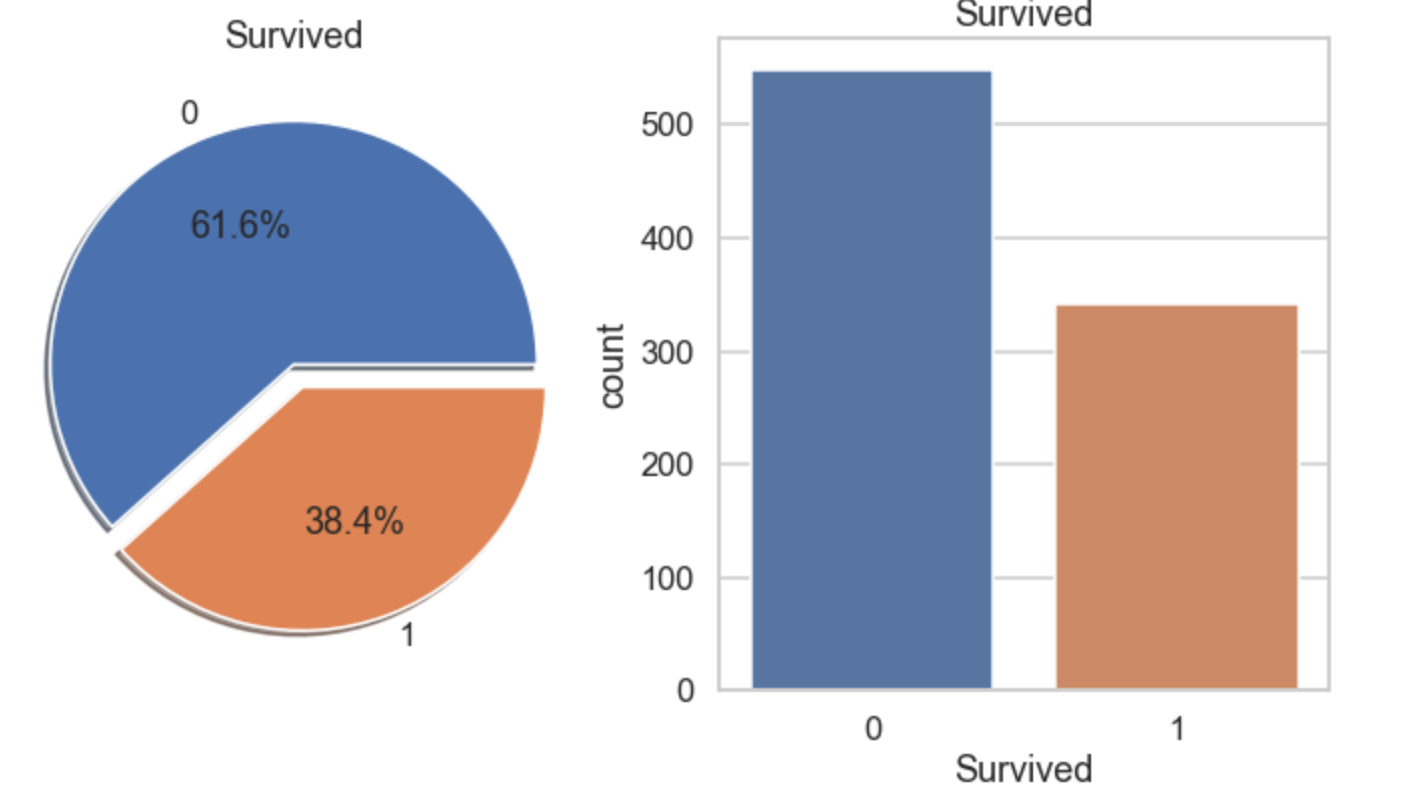


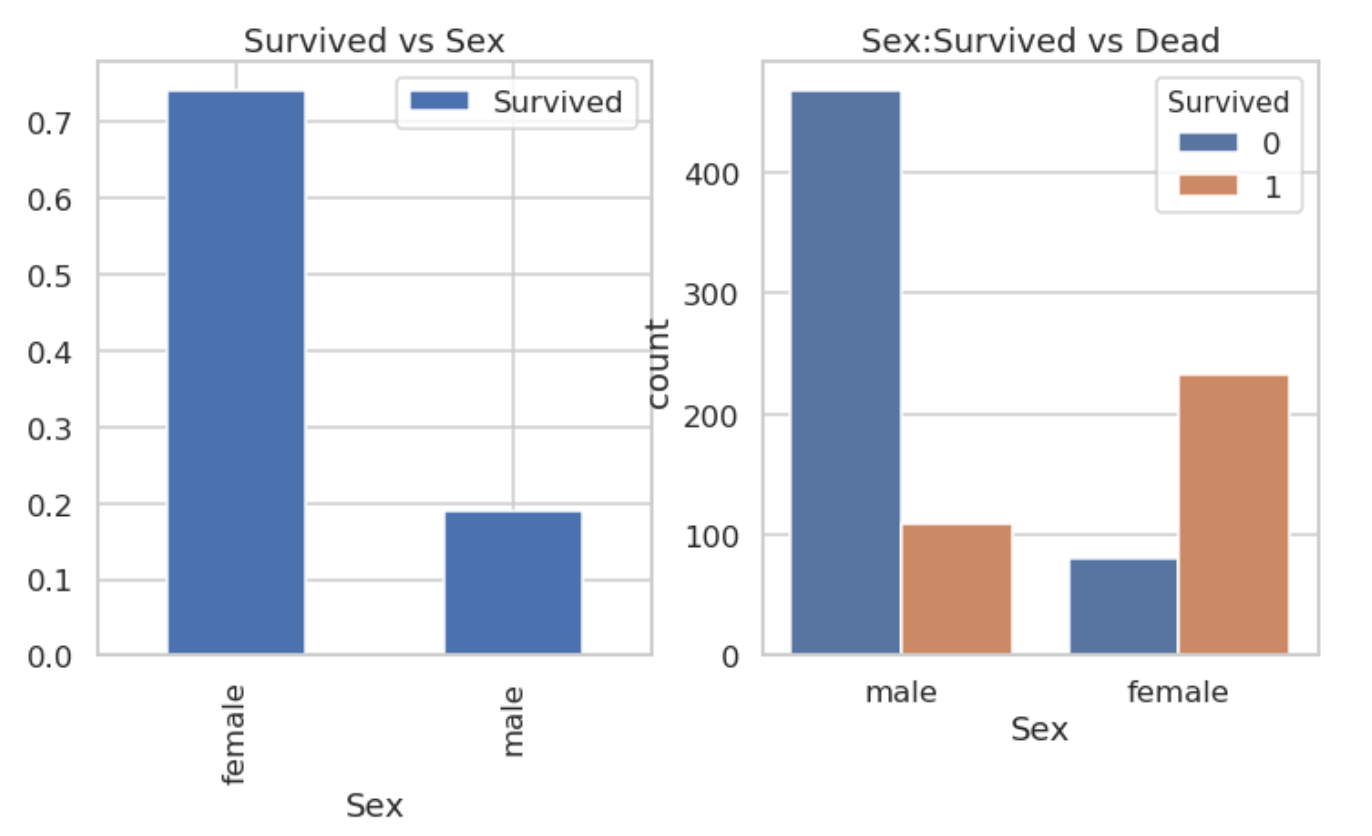

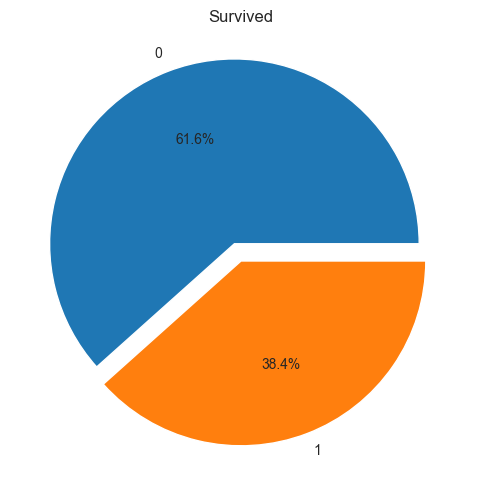

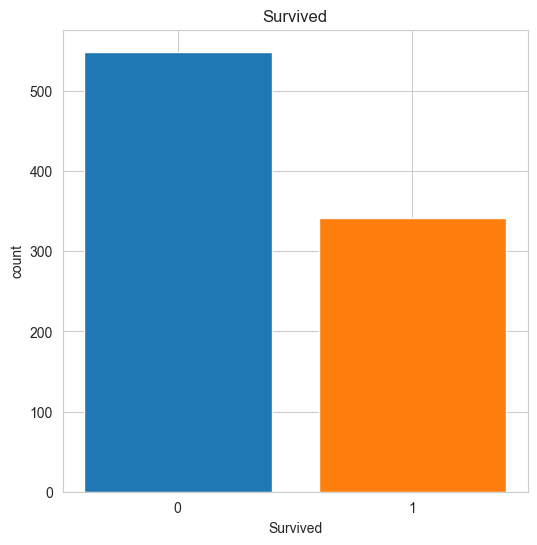

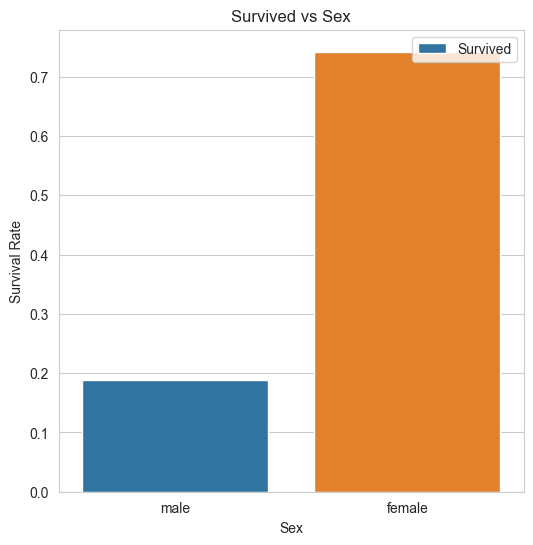

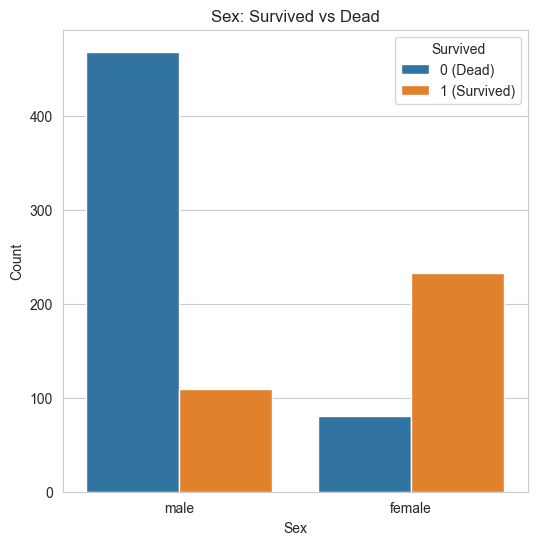

In [20]:
column_name = "Survived"
target_value = 0
total_count = len(df)

# Розрахунок кількості та відсотків
target_count = df[column_name].eq(target_value).sum()
percentage = (target_count / total_count) * 100


labels = ['0', '1']
sizes = [percentage, 100 - percentage]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.1, 0) # 0.1 відокремлення від кругу



plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Survived')
plt.show()


plt.figure(figsize=(6, 6))
plt.bar(labels, [target_count, total_count - target_count], color=colors)
plt.title('Survived')
plt.ylabel('count')
plt.xlabel('Survived')
plt.show()


plt.figure(figsize=(6, 6))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None, hue='Sex', dodge=False, palette={'male':  colors[0], 'female': colors[1]})
plt.title('Survived vs Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.legend(['Survived'], loc='upper right')
plt.show()




plt.figure(figsize=(6, 6))
sns.countplot(x="Sex", hue="Survived", data=df, palette={0: colors[0], 1: colors[1]})
plt.title("Sex: Survived vs Dead")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.legend(title="Survived", labels=["0 (Dead)", "1 (Survived)"])
plt.show()

Прокоментуйте побудовані графіки

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 

In [4]:
missing_values = df.isnull().sum()

print("Пропущені значення у кожній змінній:")
print(missing_values)

Пропущені значення у кожній змінній:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [23]:
female_names = df[df["Sex"] == "female"]["Name"]

first_names = female_names.str.extract(r"\(([^)]+)\)")[0]
first_names = first_names.str.split().str[0]

# Якщо імені в дужках немає, беремо перше ім'я після Miss. або Mrs.
first_names.fillna(female_names.str.extract(r"(?:Miss\.|Mrs\.)\s+(\w+)")[0], inplace=True)

most_common_name = first_names.value_counts().idxmax()
print("Найпопулярніше жіноче ім'я на кораблі:", most_common_name)

Найпопулярніше жіноче ім'я на кораблі: Anna


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [ ]:
male_names = df[df["Sex"] == "male"]["Name"]
male_first_names = male_names.str.extract(r"Mr\.\s+(\w+)")[0]

most_common_male_name = male_first_names.value_counts().idxmax()
print("Найпопулярніше чоловіче ім'я на кораблі:", most_common_male_name)

Найпопулярніше чоловіче ім'я на кораблі: William


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
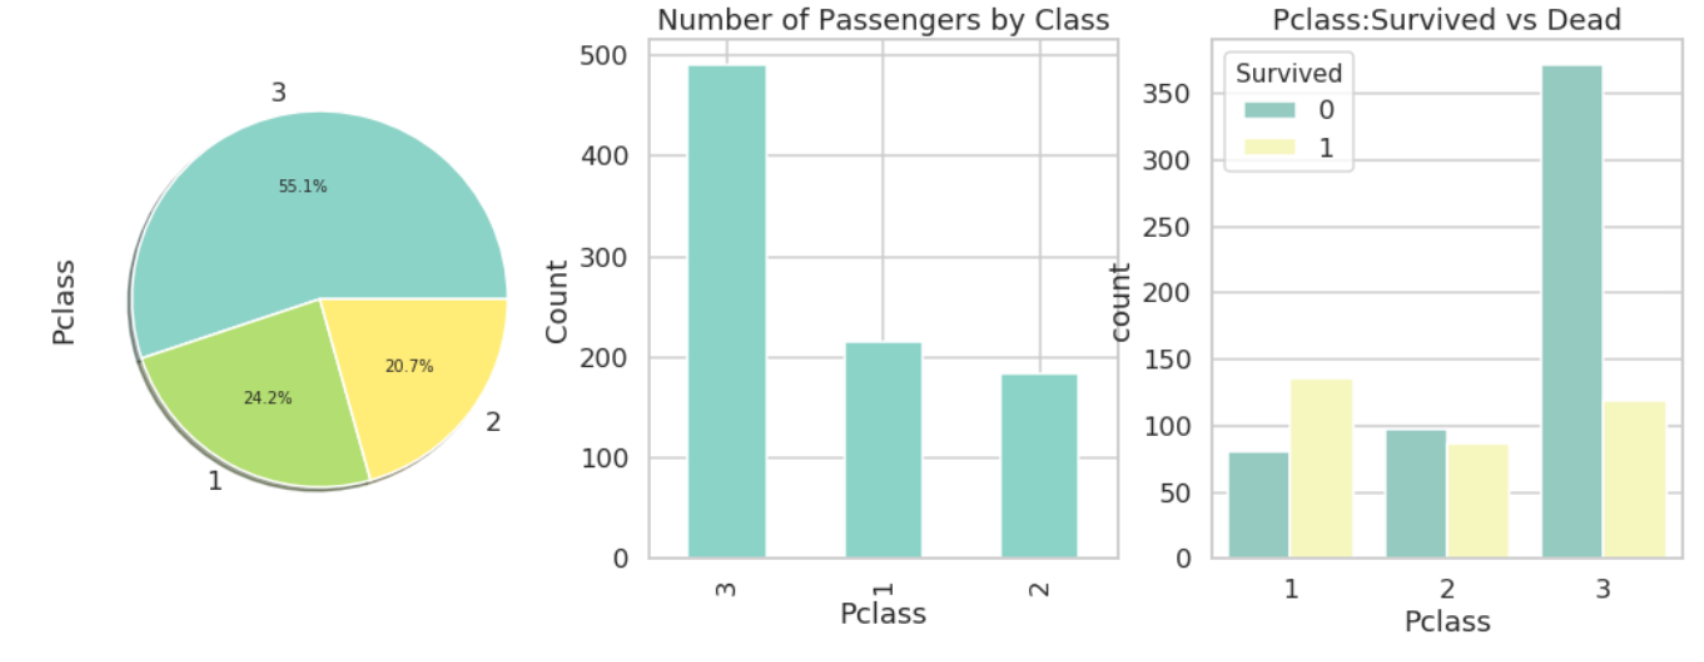

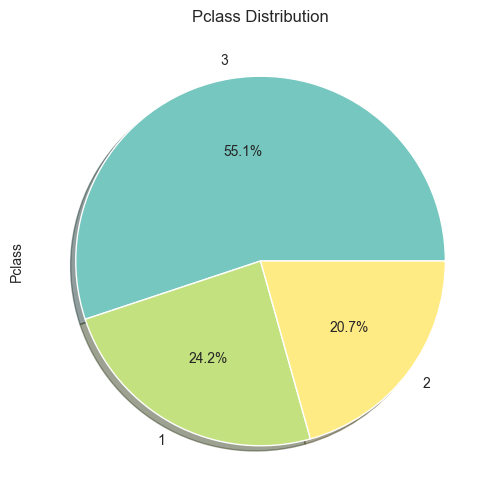

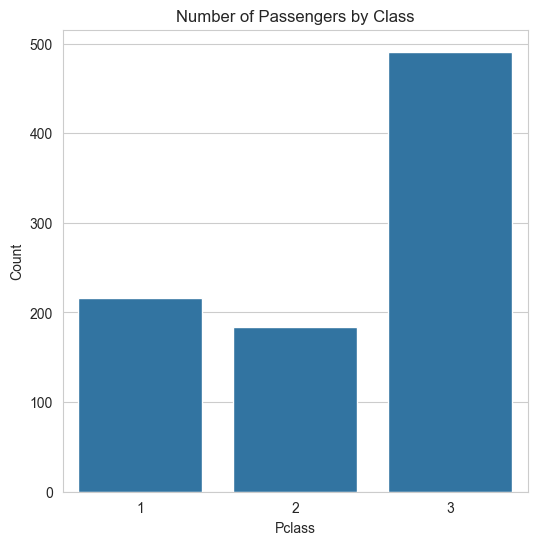

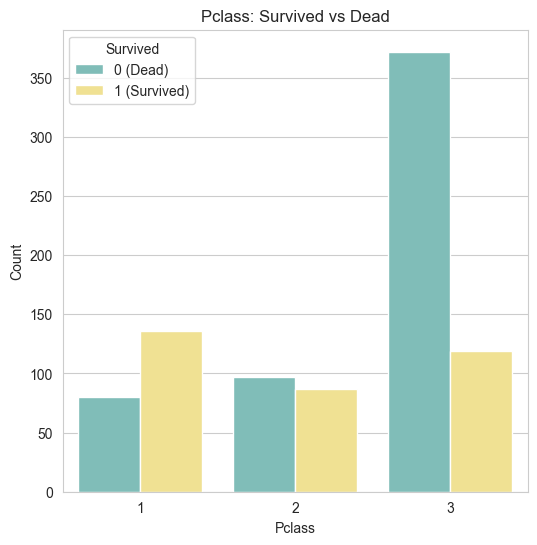

In [29]:

plt.figure(figsize=(6, 6))
df["Pclass"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["#76c7c0", "#c4e17f", "#ffeb84"], shadow=True)
plt.title("Pclass Distribution")
plt.ylabel("Pclass")
plt.show()


plt.figure(figsize=(6, 6))
sns.countplot(x="Pclass", data=df)
plt.title("Number of Passengers by Class")
plt.ylabel("Count")
plt.xlabel("Pclass")
plt.show()


plt.figure(figsize=(6, 6))
sns.countplot(x="Pclass", hue="Survived", data=df, palette={0: "#76c7c0", 1: "#ffeb84"})
plt.title("Pclass: Survived vs Dead")
plt.ylabel("Count")
plt.xlabel("Pclass")
plt.legend(title="Survived", labels=["0 (Dead)", "1 (Survived)"])
plt.show()


Прокоментуйте побудовані графіки

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
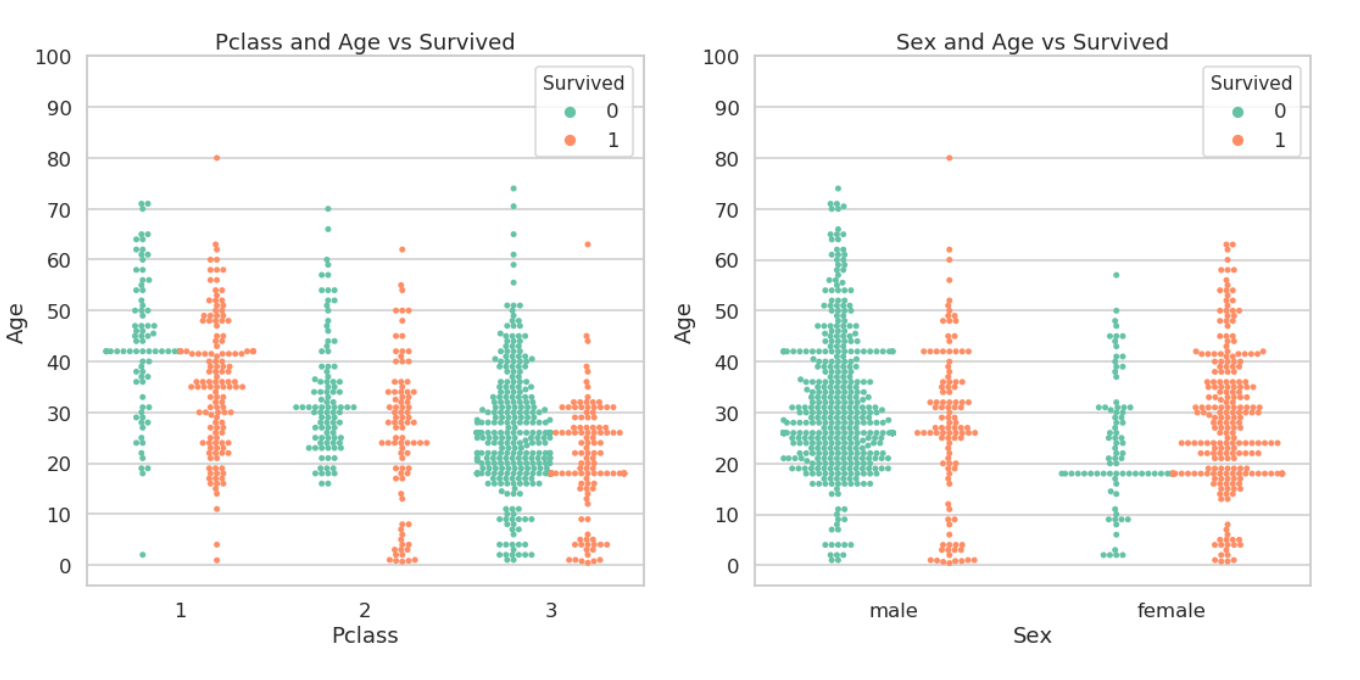![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

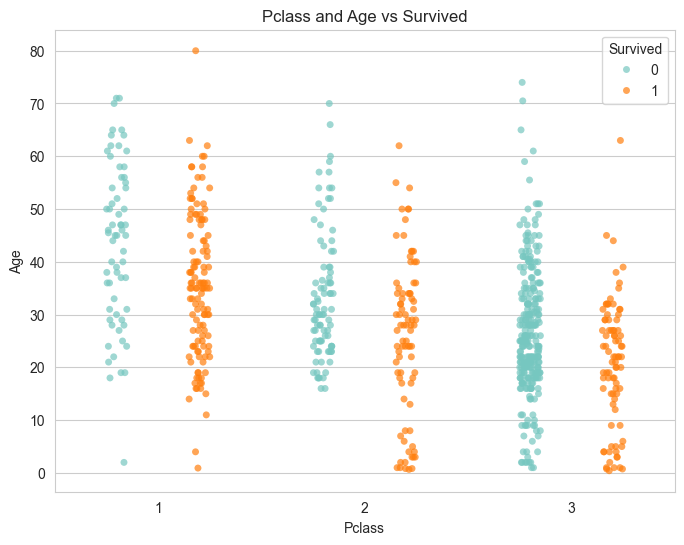

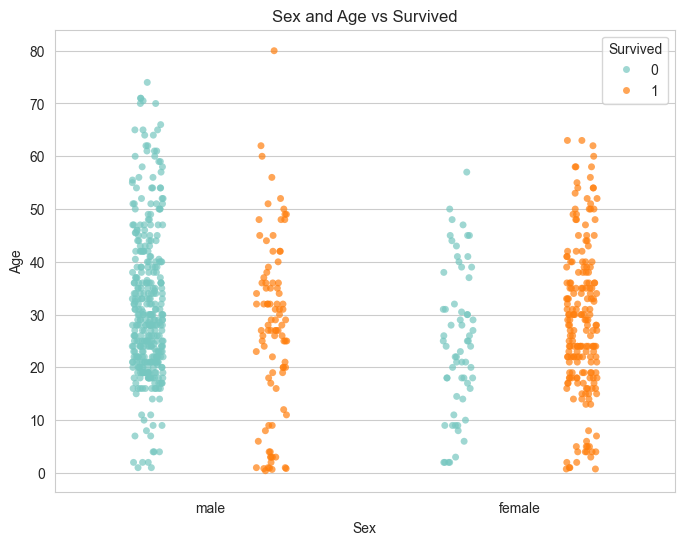

In [8]:

plt.figure(figsize=(8, 6))
sns.stripplot(x="Pclass", y="Age", hue="Survived", data=df, palette={0: "#76c7c0", 1: "#ff7f0e"}, alpha=0.7,dodge=True)
plt.title("Pclass and Age vs Survived")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.legend(title="Survived")
plt.show()



plt.figure(figsize=(8, 6))
sns.stripplot(x="Sex", y="Age", hue="Survived", data=df, palette={0: "#76c7c0", 1: "#ff7f0e"}, alpha=0.7,dodge=True)
plt.title("Sex and Age vs Survived")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.legend(title="Survived")
plt.show()

Прокоментуйте побудовані графіки

**Задача 8** Побудуйте наступні діаграми розподілів:  

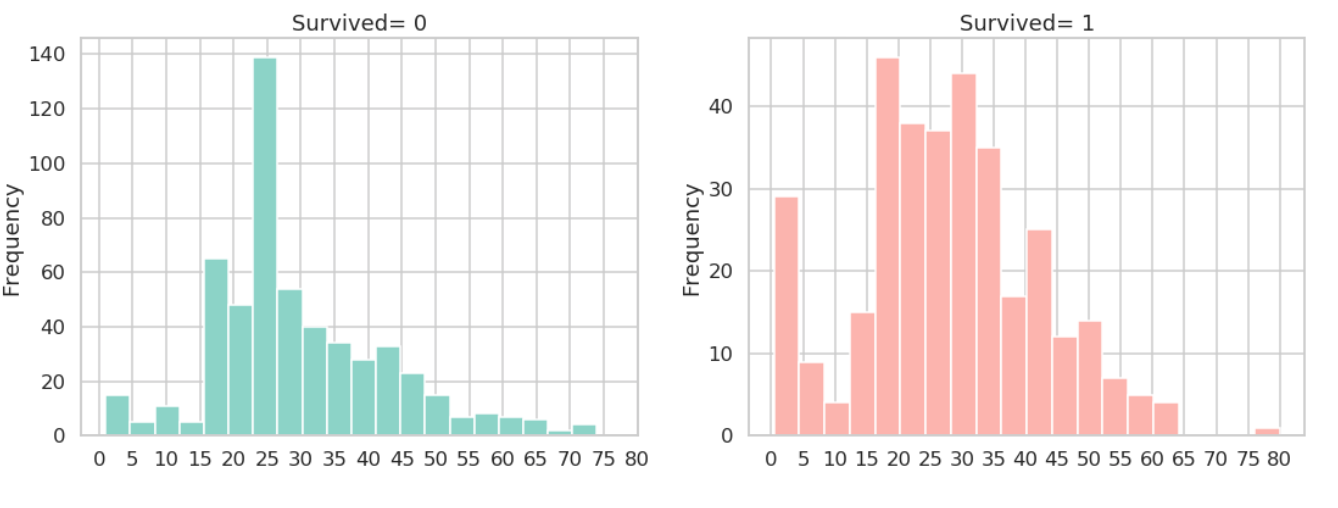



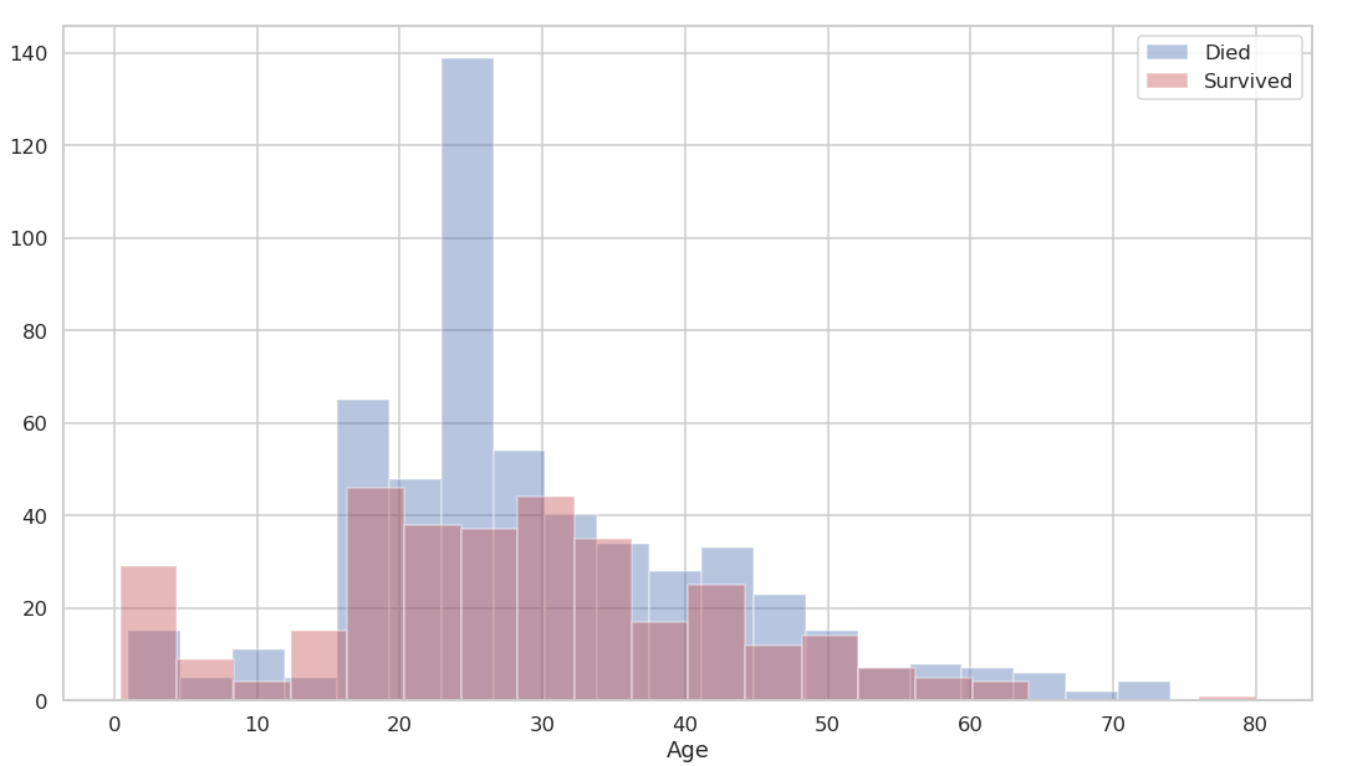

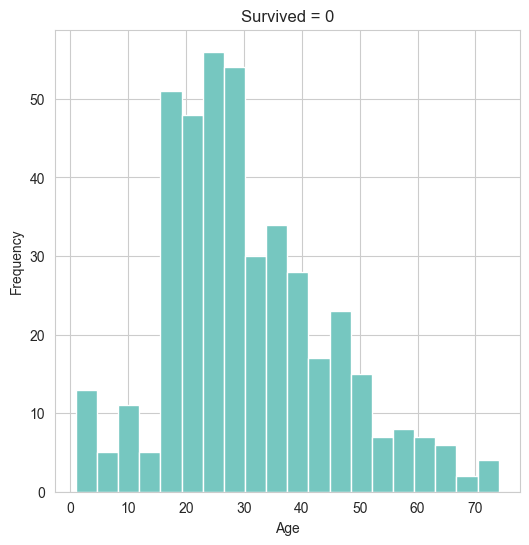

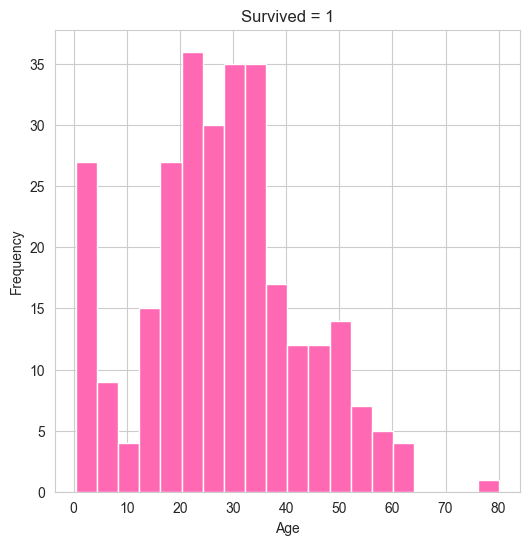

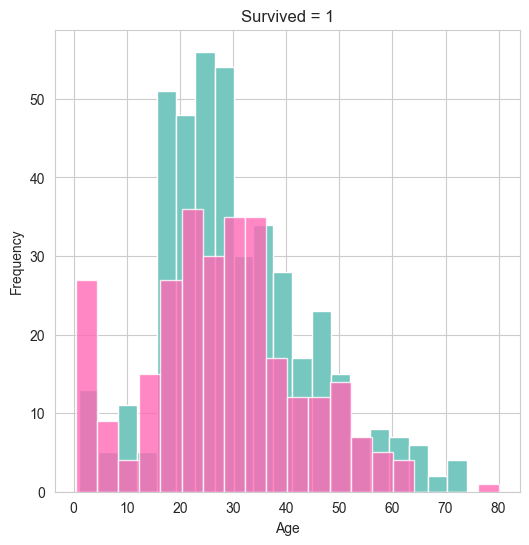

In [9]:
plt.figure(figsize=(6, 6))
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, color="#76c7c0")
plt.title("Survived = 0")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




plt.figure(figsize=(6, 6))
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, color="#ff69b4")
plt.title("Survived = 1")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 6))
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, color="#76c7c0")
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, color="#ff69b4", alpha=0.8)
plt.title("Survived = 1")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
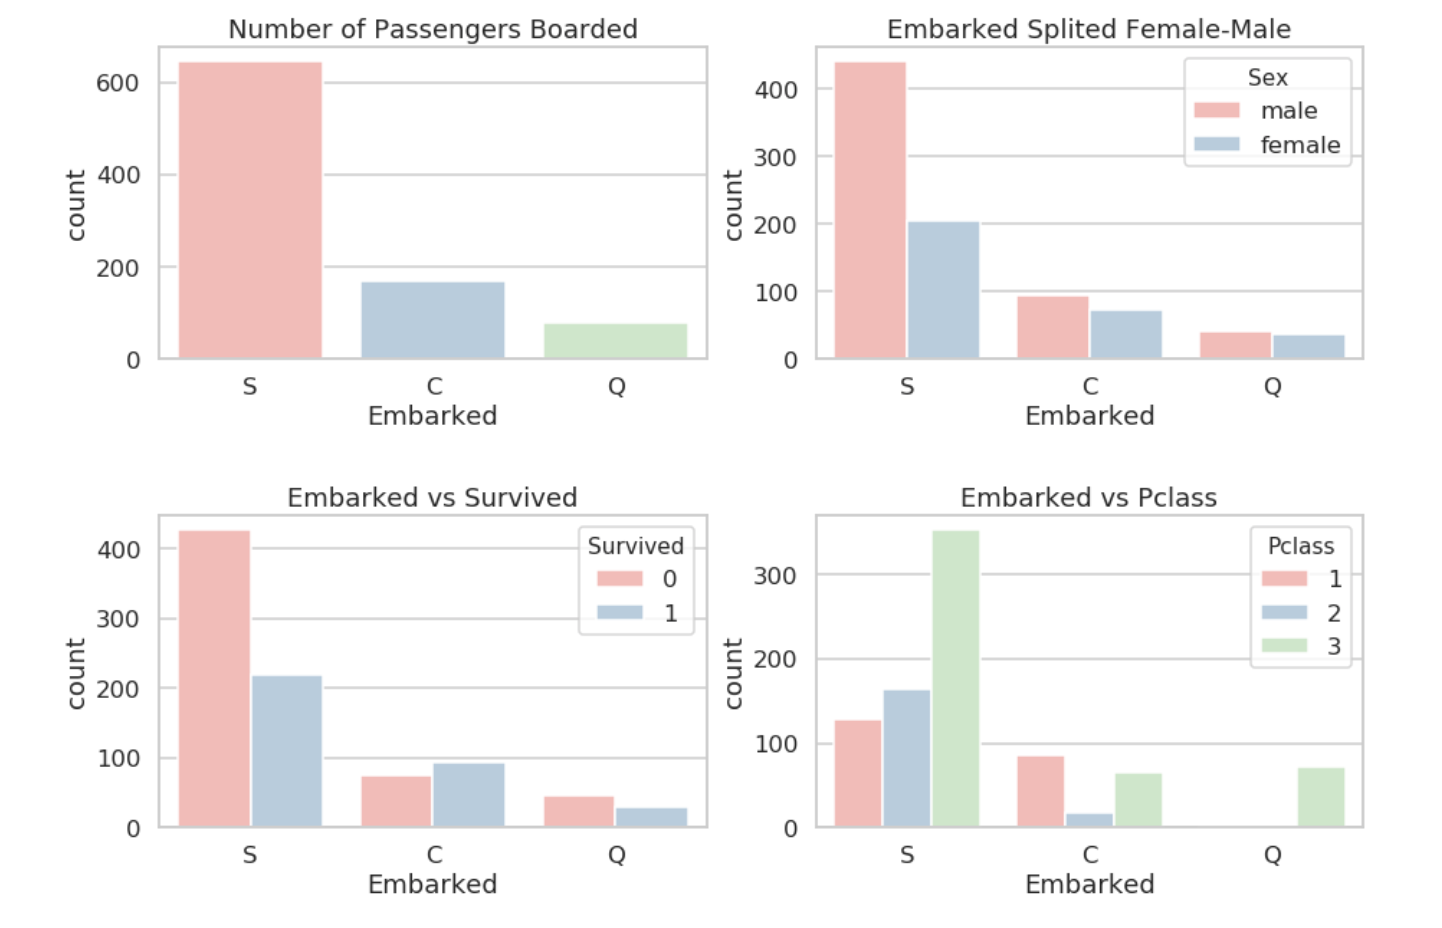

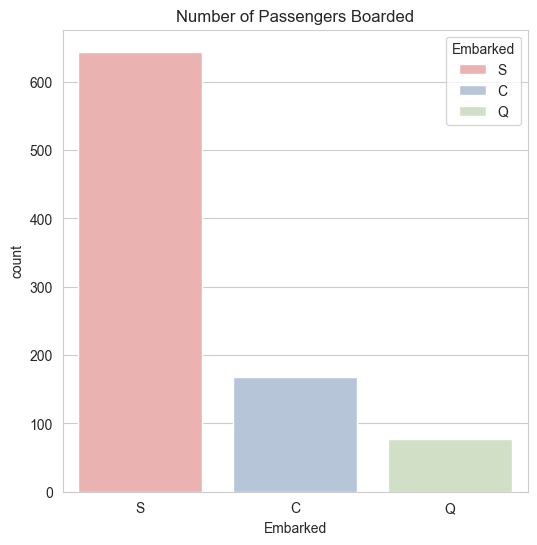

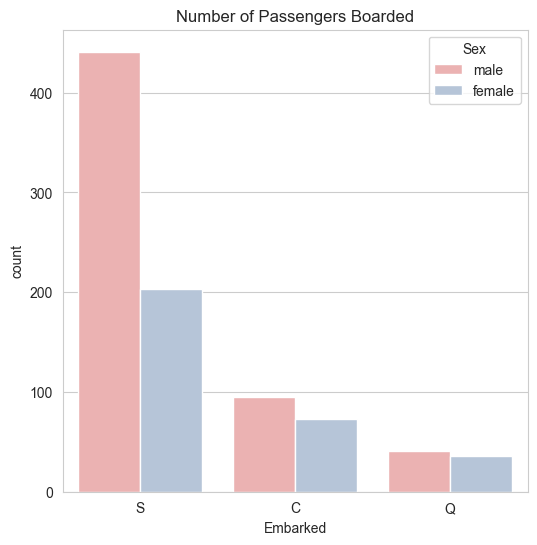

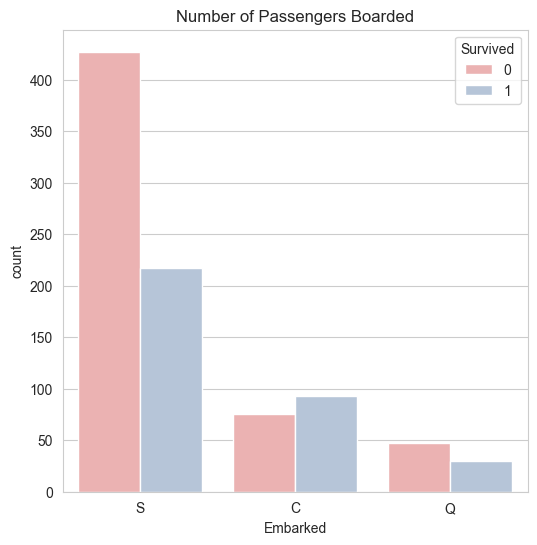

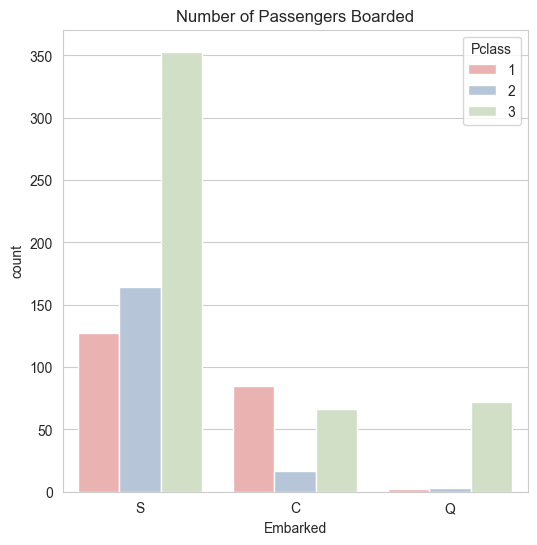

In [32]:

plt.figure(figsize=(6, 6))
sns.countplot(x="Embarked", data=df, hue = "Embarked", palette=["#f4a9a8", "#b0c4de", "#cfe3c2"])
plt.title("Number of Passengers Boarded")
plt.xlabel("Embarked")
plt.ylabel("count")
plt.show()



plt.figure(figsize=(6, 6))
sns.countplot(x="Embarked", data=df, palette=["#f4a9a8", "#b0c4de"],hue="Sex")
plt.title("Number of Passengers Boarded")
plt.xlabel("Embarked")
plt.ylabel("count")
plt.show()


plt.figure(figsize=(6, 6))
sns.countplot(x="Embarked", data=df, palette=["#f4a9a8", "#b0c4de"],hue="Survived")
plt.title("Number of Passengers Boarded")
plt.xlabel("Embarked")
plt.ylabel("count")
plt.show()


plt.figure(figsize=(6, 6))
sns.countplot(x="Embarked", data=df, palette=["#f4a9a8", "#b0c4de", "#cfe3c2"],hue="Pclass")
plt.title("Number of Passengers Boarded")
plt.xlabel("Embarked")
plt.ylabel("count")
plt.show()

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

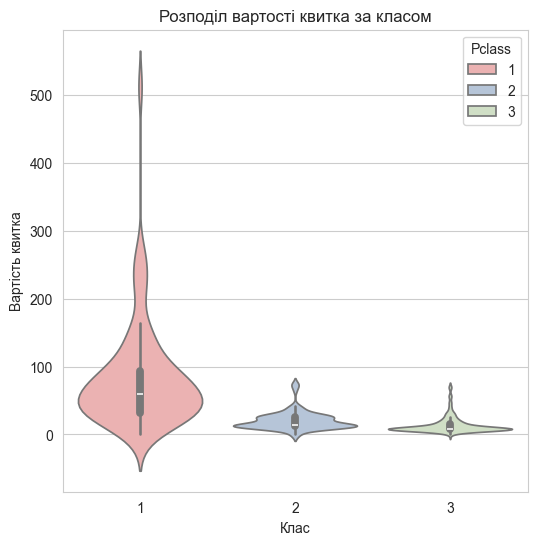

In [33]:
plt.figure(figsize=(6, 6))
sns.violinplot(x="Pclass", y="Fare", data=df, hue="Pclass",palette=["#f4a9a8", "#b0c4de", "#cfe3c2"])
plt.title("Розподіл вартості квитка за класом")
plt.xlabel("Клас")
plt.ylabel("Вартість квитка")
plt.show()